# Anomaly Detection

In [1]:
import numpy as np
import numexpr as ne
import scipy.io
import matplotlib.pyplot as plt

%matplotlib inline

## Gaussian distribution

In [2]:
def get_mean_and_variance(X):
    mean = np.mean(X, axis=0)
    variance = np.var(X, axis=0)
    return mean, variance

In [3]:
def gaussian_distribution(X, mean, variance):
    scalar = 1 / np.sqrt(2 * np.pi * variance)
    exp = - (((X - mean) ** 2) / (2 * variance))
    p_each_feature = scalar * np.power(np.e, exp)
    return np.prod(p_each_feature, axis=1)

In [4]:
ex8data1 = scipy.io.loadmat('data/ex8data1.mat')
X = ex8data1['X']
y = ex8data1['yval']
normal_samples = X[np.where(y.flatten()==0)]
anomaly_samples = X[np.where(y.flatten()==1)]

In [5]:
mean, variance = get_mean_and_variance(X)

In [6]:
x_plot = np.arange(0, 25, 0.1)
y_plot = np.arange(0, 25, 0.1)
new_features_x = np.repeat(x_plot, np.size(y_plot))
new_features_x = new_features_x.reshape(np.size(new_features_x), 1)
new_features_y = np.tile(y_plot, np.size(x_plot))
new_features_y = new_features_y.reshape(np.size(new_features_y), 1)
new_features = np.append(new_features_x, new_features_y, axis=1)

In [7]:
res = gaussian_distribution(new_features, mean, variance)
res = res.reshape(np.size(x_plot), np.size(y_plot))

In [8]:
xx = []
yy = []
for i in range(np.size(res, axis=0)):
    for j in range(np.size(res, axis=1)):
        val = res[i, j]
        if val < 0.0008 and val > 0.0006:
            xx.append(x_plot[i])
            yy.append(y_plot[j])

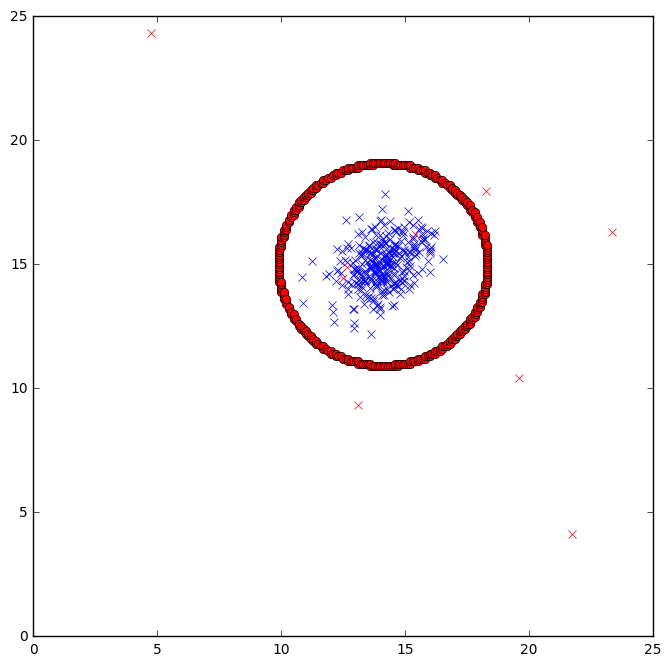

In [9]:
plt.figure(figsize=(8, 8))
plt.plot(xx, yy, 'ro')
plt.plot(normal_samples[:, 0], normal_samples[:, 1], 'bx')
plt.plot(anomaly_samples[:, 0], anomaly_samples[:, 1], 'rx')
plt.show()

## Selecting the threshold

In [10]:
epsilon = 8.99e-05
res = gaussian_distribution(X, mean, variance)
res = res < epsilon

In [11]:
precision_arr = y[res.flatten()==True]
recall_arr = res[y.flatten()==1]
precision = np.count_nonzero(precision_arr) / np.size(precision_arr)
recall = np.count_nonzero(recall_arr) / np.size(recall_arr)
f1_score = 2 * precision * recall / (precision + recall)

In [12]:
print('Precision: {0:.2f}'.format(precision))
print('Recall: {0:.2f}'.format(recall))
print('F1: {0:.2f}'.format(f1_score))

Precision: 1.00
Recall: 0.67
F1: 0.80


## High dimensional dataset

In [13]:
def get_mean_and_sigma(X):
    mean = np.mean(X, axis=0)
    X_sub_mean = X - mean
    Sigma = (X_sub_mean).T @ (X_sub_mean)
    return mean, Sigma

In [14]:
def gaussian_distribution_multivariate(X, mean, Sigma):
    n = np.size(X, axis=1)
    Sigma_det = np.linalg.det(Sigma)
    X_sub_mean = X - mean
    exp = np.exp(-0.5 * np.sum(((X_sub_mean @ np.linalg.pinv(Sigma))) * X_sub_mean, axis=1))
    scalar = 1 / ((2 * np.pi) ** (n/2) * (Sigma_det ** 0.5))
    return scalar * exp

In [15]:
ex8data2 = scipy.io.loadmat('data/ex8data2.mat')
X = ex8data2['X']
y = ex8data2['yval']

In [16]:
mean, Sigma = get_mean_and_sigma(X)

In [26]:
res = gaussian_distribution_multivariate(X, mean, Sigma)

In [37]:
threshold = 2.02337262e-31
res = res < threshold
print("{0} anomalies found.".format(np.count_nonzero(res)))

66 anomalies found.
